In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

Making a Dataset:

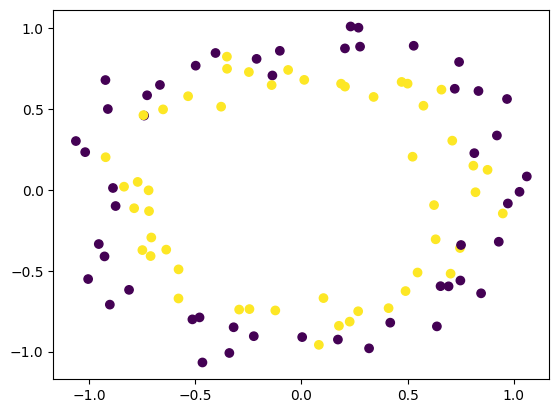

In [34]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Splitting the dataset:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

**Model Training:**

In [36]:
#Defining the model
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

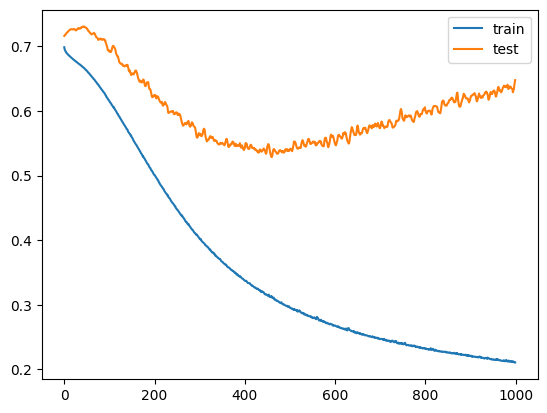

In [37]:
#if we plot the training and test/validation loss to check the performance
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

As you can clearly see, it has overfit the data. That means it is performing well on the training data but after 400 epoch the test loss started increasing that means our model started overfitting after 400 epochs.

So we can use Early Stopping to exactly stop the Model Trainig once It has reach to optimal loss (minimized), to stop further training and overfitting :)

# Implementing Early Stopping:

In [45]:
#model will stay same

model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#compiling
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
#making object of EarlyStopping as a callback that we can pass while training the model
callback = EarlyStopping(
    #so we want to monitor val loss-->that means if test/validation loss starts to go up, stop right there...We can also do that on accuracy but for that it will stop when it will go down
    monitor="val_loss",

    #min_delta tell about the improvement--->means 0.00001 will be the minimum value of loss that will be reduced and will be cosidered as improvement
    min_delta=0.00001,

    #patience shows number of epochs that will be tolerated with no change -->in this case if nothing happen for 20 epochs, it will stop
    patience=20,

    #we want to show where and why it stops --->=1 just write Early Stopping with the epoch when stops it
    verbose=1,

    #mode will configure to stop when monitored quantity stop increasing (for accuuracy) and stop decreasing (for loss)
    #with auto keras will automatically know that in cas of accuracy I have to stop when it stops increasing and reverse in the case of the loss
    mode="auto",

    #with baseline we can give number about the monitoring quantit, if it reaches that number, it stops (usually not given)
    baseline=None,

    #use the weights that were lowest while training
    restore_best_weights=True
)

In [47]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 99ms/step - loss: 0.6909 - accuracy: 0.5375 - val_loss: 0.7002 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6892 - accuracy: 0.5375 - val_loss: 0.7027 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6875 - accuracy: 0.5375 - val_loss: 0.7039 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6869 - accuracy: 0.5250 - val_loss: 0.7055 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6858 - accuracy: 0.5250 - val_loss: 0.7073 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6847 - accuracy: 0.5500 - val_loss: 0.7091 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6841 - accuracy: 0.5375 - val_loss: 0.7111 - val_accuracy: 0.4000
Epoch 8/3500


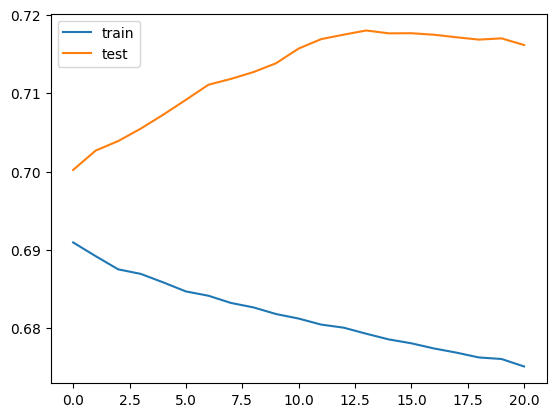

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()